# Lab 1A – Encriptado y Decriptado de Texto

## Librerías

In [3]:
from sympy import mod_inverse
import matplotlib.pyplot as plt

## Encriptación y Decriptación de Texto

In [1]:
def cleanText(text):
    text = text.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")

    return ''.join(char for char in text if char.isalpha())

alphabet = "abcdefghijklmnñopqrstuvwxyz"
m = len(alphabet)
mensaje = "cifrando la palabra cifrado"


### Cifrado Caesar

In [11]:
def caesarEncrypt(message, key):
    message = cleanText(message)
    return ''.join(alphabet[(alphabet.index(char) + key) % m] for char in message)

def caesarDecrypt(cipher, key):
    return ''.join(alphabet[(alphabet.index(char) - key) % m] for char in cipher)

In [7]:
k = int(input("Ingrese la llave (k): "))
print("Cifrado Caesar: ", caesarEncrypt(mensaje, k))

Cifrado Caesar:  hnkwfritpfufpfgwfhnkwfit


In [8]:
cipher = input("Ingrese el mensaje cifrado: ")
k = int(input("Ingrese la llave (k) con la que se cifró el mensaje: "))
print("Decifrado Caesar: ", caesarDecrypt(cipher, k))

Decifrado Caesar:  cifrandolapalabracifrado


### Cifrado afín

In [22]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def analyseAB(a, b):
    if a < 0 or a > m or b < 0 or b > m:
        return False
    
    if gcd(a, m) != 1:
        return False
    return True

def affineEncrypt(message, a, b):
    message = cleanText(message)
    return ''.join(alphabet[(a * alphabet.index(char) + b) % m] for char in message)

def affineDecrypt(cipher, a, b):
    aInverse = mod_inverse(a, m)
    return ''.join(alphabet[(aInverse * (alphabet.index(char) - b)) % m] for char in cipher)

In [15]:
a = int(input("Ingrese la llave (a): "))
b = int(input("Ingrese la llave (b): "))
if not analyseAB(a, b):
    print("\033[31mLas llaves no son válidas\033[0m")
else:
    print("Cifrado afín: ", affineEncrypt(mensaje, a, b))

Cifrado afín:  nkywfdqlvfofvfjwfnkywfql


In [23]:
cipher = input("Ingrese el mensaje cifrado: ")
a = int(input("Ingrese la llave (a) con la que se cifró el mensaje: "))
b = int(input("Ingrese la llave (b) con la que se cifró el mensaje: "))
if not analyseAB(a, b):
    print("\033[31mLas llaves no son válidas\033[0m")
else:
    print("Decifrado afín: ", affineDecrypt(cipher, a, b))

Decifrado afín:  cifrandolapalabracifrado


### Cifrado Vigenere

In [2]:
def vigenereEncrypt(message, key):
    message = cleanText(message)
    return ''.join(alphabet[(alphabet.index(char) + alphabet.index(key[i % len(key)])) % m] for i, char in enumerate(message))

def vigenereDecrypt(cipher, key):
    return ''.join(alphabet[(alphabet.index(char) - alphabet.index(key[i % len(key)])) % m] for i, char in enumerate(cipher))

In [33]:
key = input("Ingrese la llave (key): ")
print("Cifrado Vigenere: ", vigenereEncrypt(mensaje, key))

Cifrado Vigenere:  jwprhbñoroaaromrhqsfyoño


In [34]:
cipher = input("Ingrese el mensaje cifrado: ")
key = input("Ingrese la llave (key) con la que se cifró el mensaje: ")
print("Decifrado Vigenere: ", vigenereDecrypt(cipher, key))

Decifrado Vigenere:  cifrandolapalabracifrado


# Análisis de Frecuencia


In [7]:
def frequencyAnalysis(cipher):
    frequency = {}
    for char in alphabet:
        frequency[char] = cipher.count(char) / len(cipher) * 100
    return frequency

frequency = frequencyAnalysis(input("Ingrese el mensaje cifrado: "))
print(frequency)

{'a': 8.333333333333332, 'b': 4.166666666666666, 'c': 0.0, 'd': 0.0, 'e': 0.0, 'f': 4.166666666666666, 'g': 0.0, 'h': 8.333333333333332, 'i': 0.0, 'j': 4.166666666666666, 'k': 0.0, 'l': 0.0, 'm': 4.166666666666666, 'n': 0.0, 'ñ': 8.333333333333332, 'o': 20.833333333333336, 'p': 4.166666666666666, 'q': 4.166666666666666, 'r': 16.666666666666664, 's': 4.166666666666666, 't': 0.0, 'u': 0.0, 'v': 0.0, 'w': 4.166666666666666, 'x': 0.0, 'y': 4.166666666666666, 'z': 0.0}


# Distribución de Frecuencias


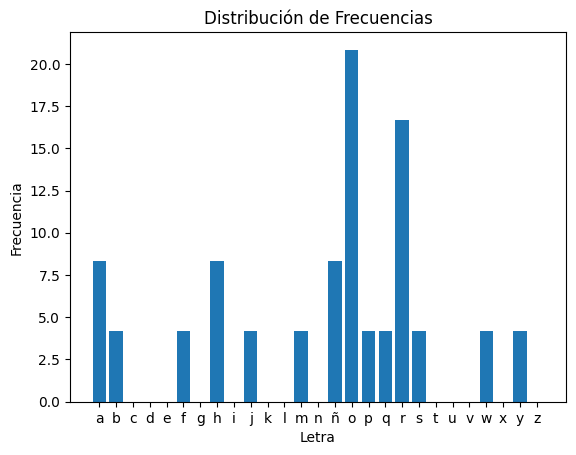

In [8]:
def frequencyDistribution(frequency):
    plt.bar(frequency.keys(), frequency.values())
    plt.title("Distribución de Frecuencias")
    plt.xlabel("Letra")
    plt.ylabel("Frecuencia")
    plt.show()


frequencyDistribution(frequency)